# Chessmen Classification Project using Transfer Learning
## V1

Importing necessary libraries

In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import imageio
import cv2
import os
import glob
import pickle
from PIL import Image, ImageOps, ImageFilter
import scipy.ndimage as ndi
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import random 
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten,Activation,MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau
from keras.utils import plot_model

Defining the classes we have for each chess piece and the data directory

In [3]:
CATAGORIES=['Bishop','King','Knight','Pawn','Queen','Rook'] ## define the list of number of classes we are going to use.


In [4]:
dirname = './Data/input/Chessman-image-dataset/Chess'
dir_chess_folders = os.listdir(dirname)
dir_chess_paths = [os.path.join(dirname, path) for path in dir_chess_folders]

In [4]:
os.mkdir('./Data/working/chess')

os.mkdir('./Data/working/chess/bishop')
os.mkdir('./Data/working/chess/knight')
os.mkdir('./Data/working/chess/queen')
os.mkdir('./Data/working/chess/rook')
os.mkdir('./Data/working/chess/king')
os.mkdir('./Data/working/chess/pawn')

In [5]:
train_dir='./Data/working/chess'

In [6]:
bishop_path_work = os.path.join(train_dir, 'bishop')

knight_path_work = os.path.join(train_dir, 'knight')

queen_path_work = os.path.join(train_dir, 'queen')

rook_path_work = os.path.join(train_dir, 'rook')

king_path_work = os.path.join(train_dir, 'king')

pawn_path_work = os.path.join(train_dir, 'pawn')

In [7]:
dir_chess_folders_work = os.listdir(train_dir)
dir_chess_paths_work = [os.path.join(train_dir, path) for path in dir_chess_folders_work]

In [7]:
dir_chess_paths_work

['./Data/working/chess\\bishop',
 './Data/working/chess\\king',
 './Data/working/chess\\knight',
 './Data/working/chess\\pawn',
 './Data/working/chess\\queen',
 './Data/working/chess\\rook']

See what kind of images we have in our dataset

In [8]:
def plot_imgs(item_dir, title=" ", num_imgs=4, cmap='viridis'):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(15, 15))
    for idx, img_path in enumerate(item_files):
        plt.subplot(8, 8, idx+1)
        img = plt.imread(img_path, 0)
        plt.title(title)
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()

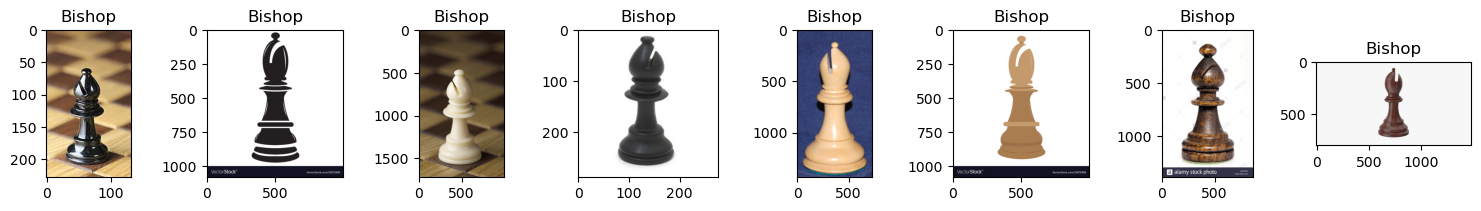

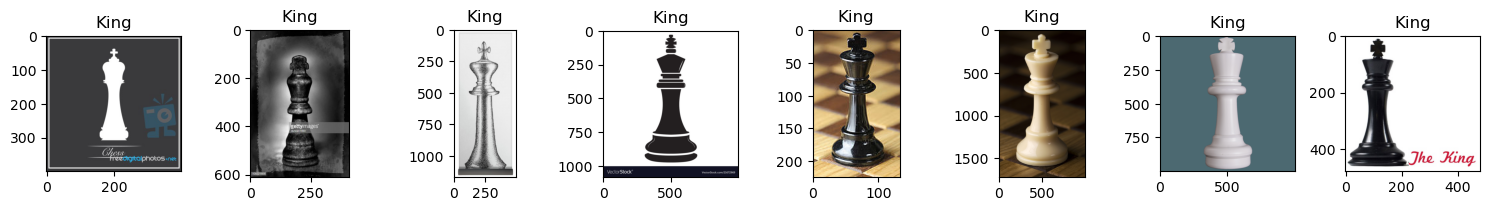

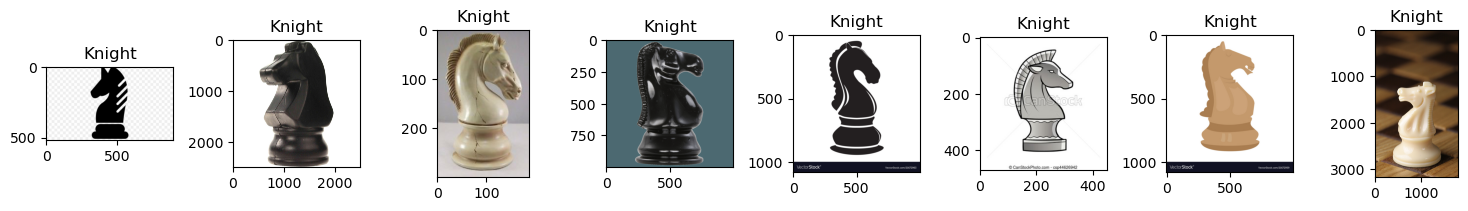

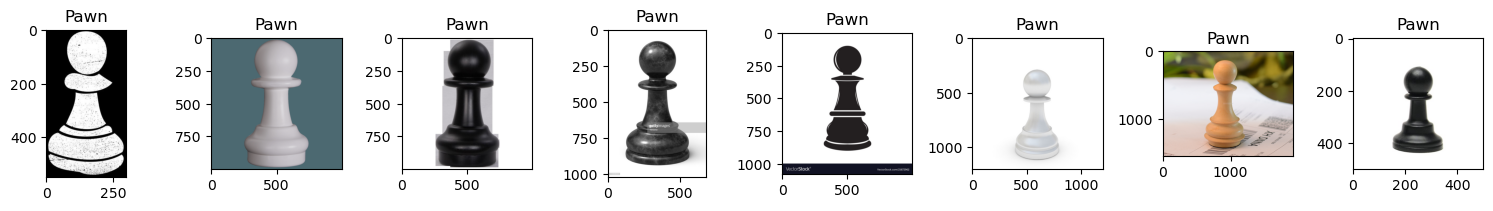

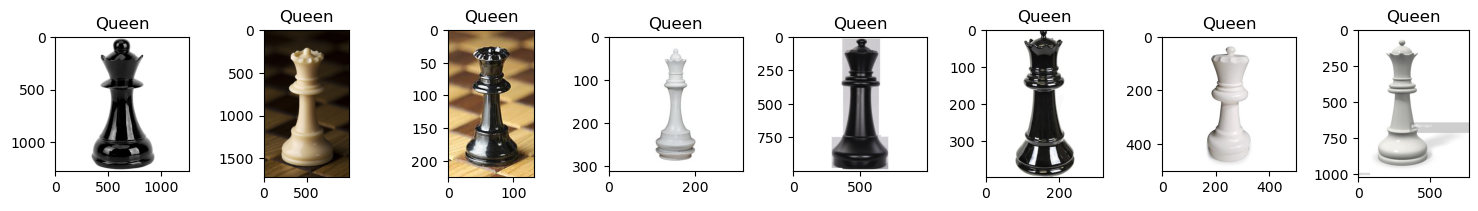

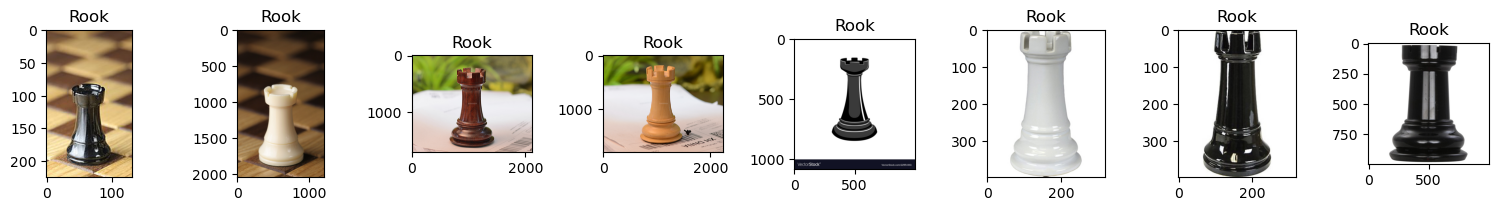

In [9]:
for path in dir_chess_paths:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8)

Get the number of pictures available for each class

In [10]:
chess_dic = {}
for path in dir_chess_paths:
    head, tail = os.path.split(path)
    chess_dic[tail] = len(os.listdir(path))

In [11]:
classes_list = ["{}: {}".format(key, chess_dic[key]) for key in chess_dic]
print(classes_list)

['Bishop: 87', 'King: 76', 'Knight: 106', 'Pawn: 107', 'Queen: 78', 'Rook: 102']


Checking the histograms of some sample images to see the distribution

In [12]:
def plot_img_hist(item_dir, num_img=6):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]

    #plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        fig1 = plt.figure(idx,figsize=(10, 10))
        fig1.add_subplot(2, 2, 1)
        img = mpimg.imread(img_path, 0)
        plt.imshow(img)
        fig1.add_subplot(2, 2, 2)
        plt.hist(img.ravel(),bins=256, fc='k', ec='k')

    plt.tight_layout()

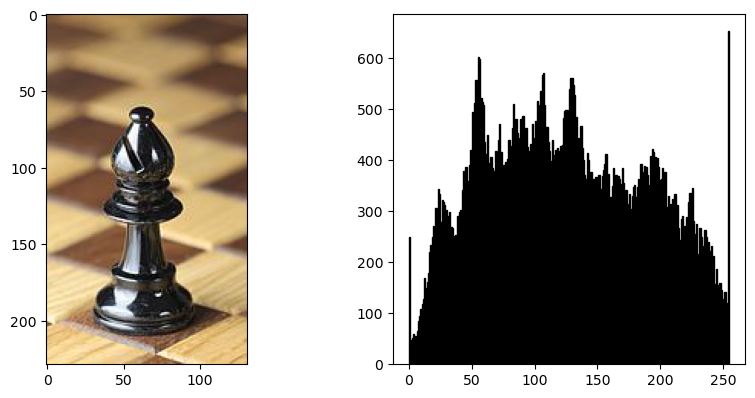

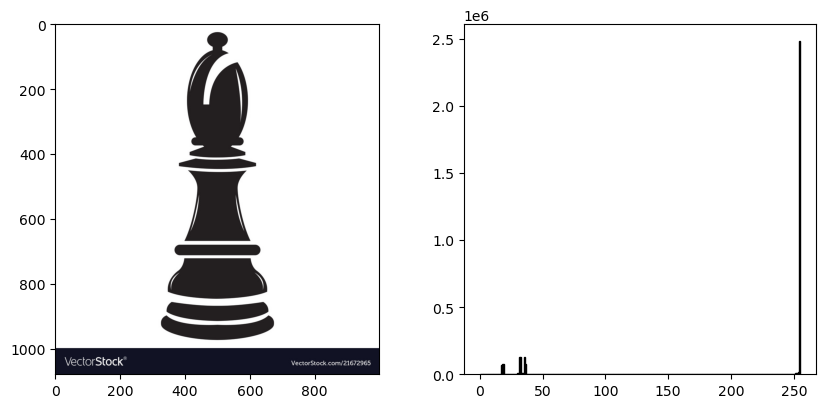

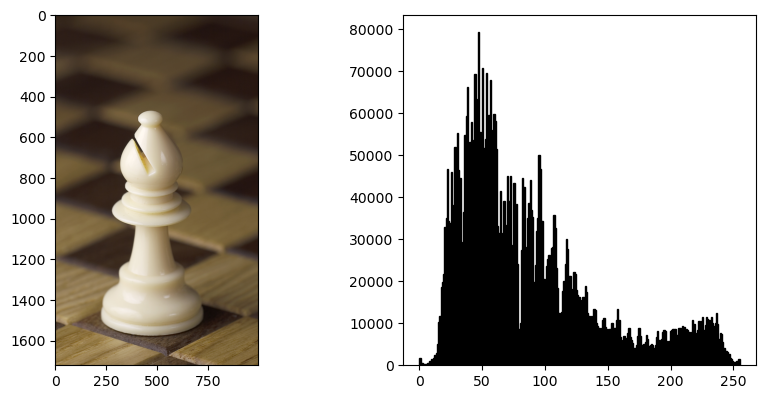

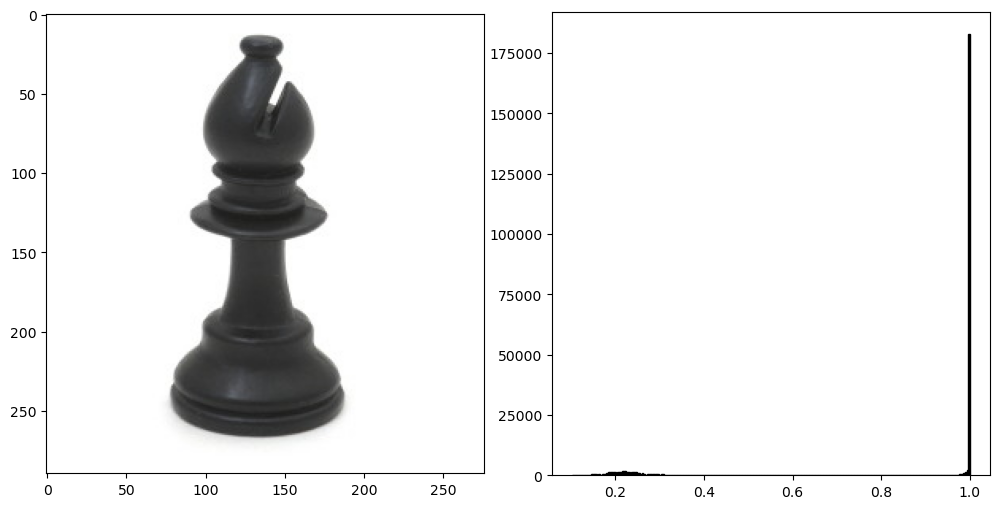

In [13]:
plot_img_hist(dir_chess_paths[0], 4)

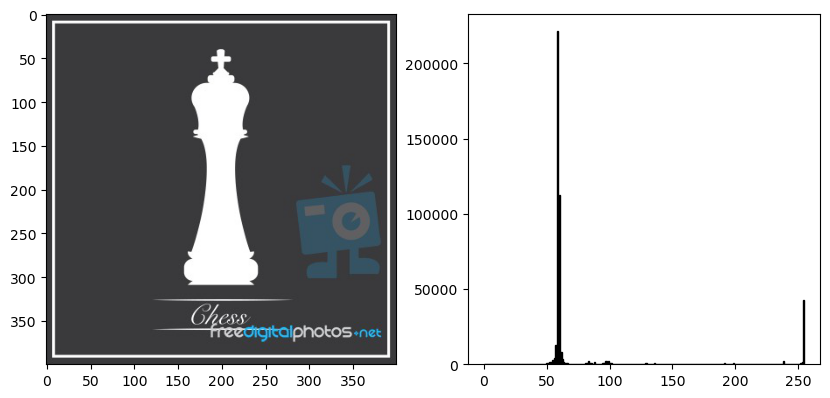

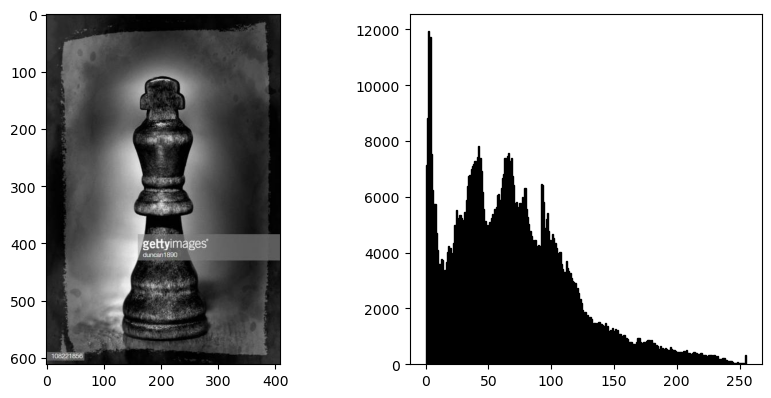

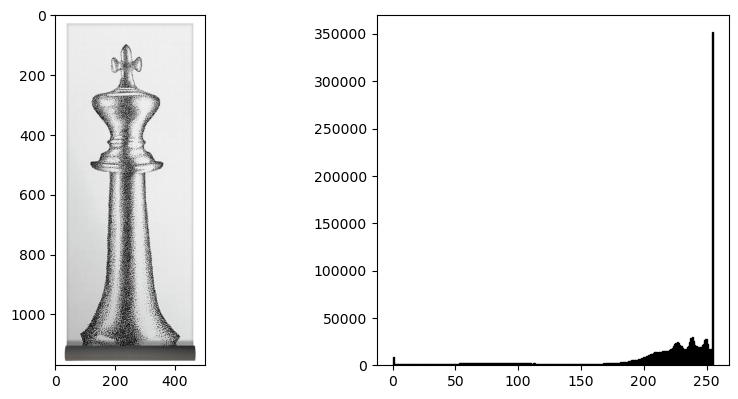

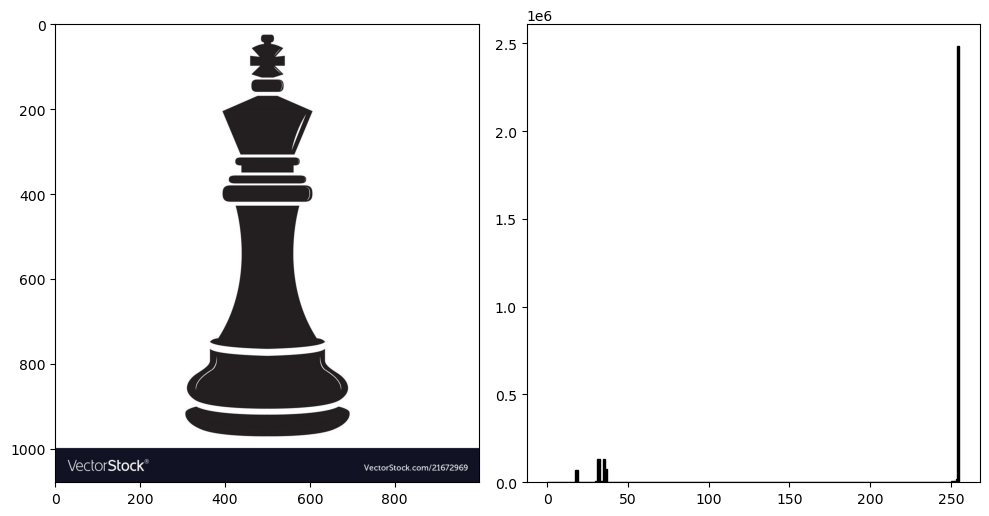

In [18]:
plot_img_hist(dir_chess_paths[1], 4)

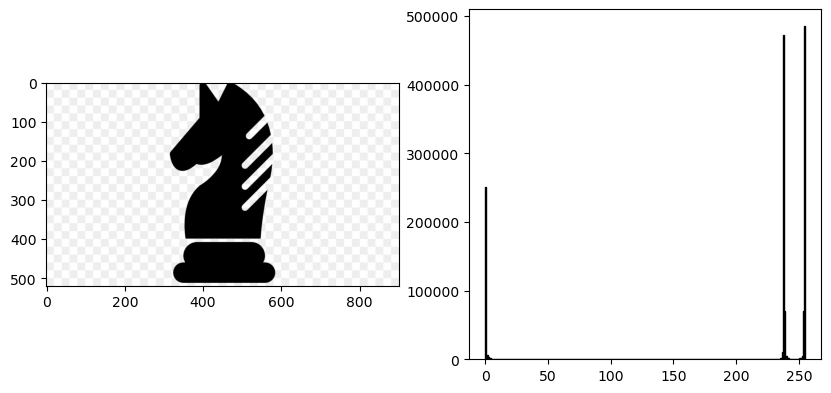

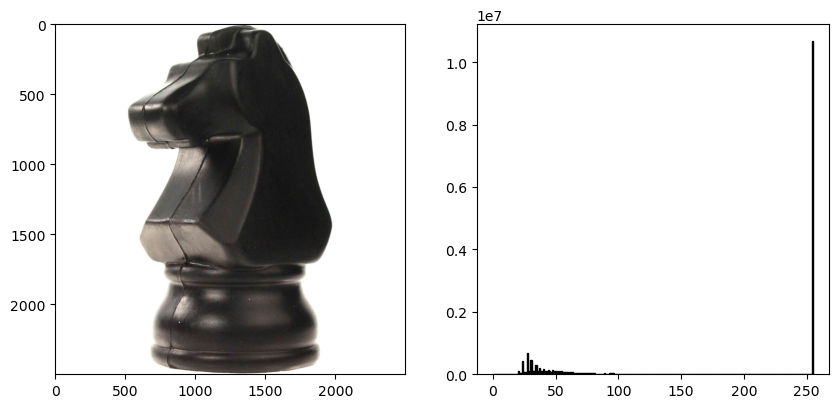

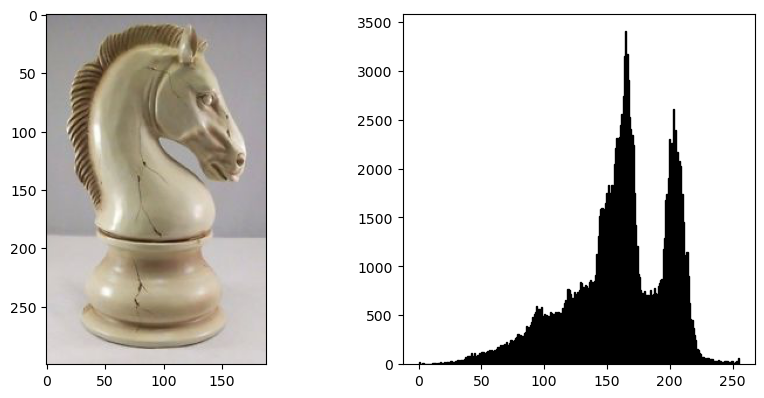

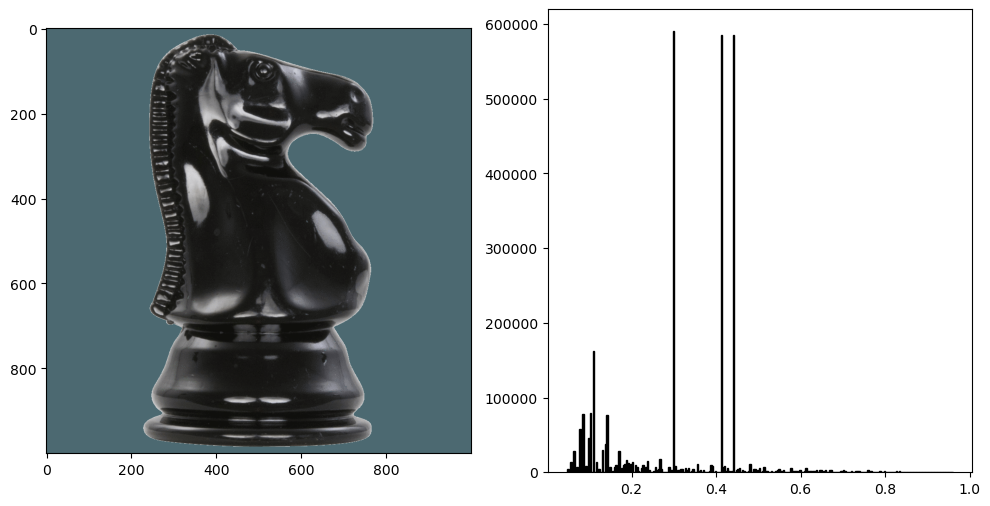

In [19]:
plot_img_hist(dir_chess_paths[2], 4)

In [14]:
def image_binarization(path_from, path_to):

    i=1
    files = os.listdir(path_from)
    for file in files: 
        try:
            file_dir = os.path.join(path_from, file)
            file_dir_save = os.path.join(path_to, file)
            img = Image.open(file_dir)
            img = img.convert("1")
            img.save(file_dir_save) 
            i=i+1
        except:
            continue

In [15]:
image_binarization(dir_chess_paths[0], bishop_path_work)

In [16]:
image_binarization(dir_chess_paths[1], king_path_work)

In [17]:
image_binarization(dir_chess_paths[2], rook_path_work)

In [18]:
image_binarization(dir_chess_paths[3], pawn_path_work)

In [19]:
image_binarization(dir_chess_paths[4], queen_path_work)

In [20]:
image_binarization(dir_chess_paths[5], knight_path_work)

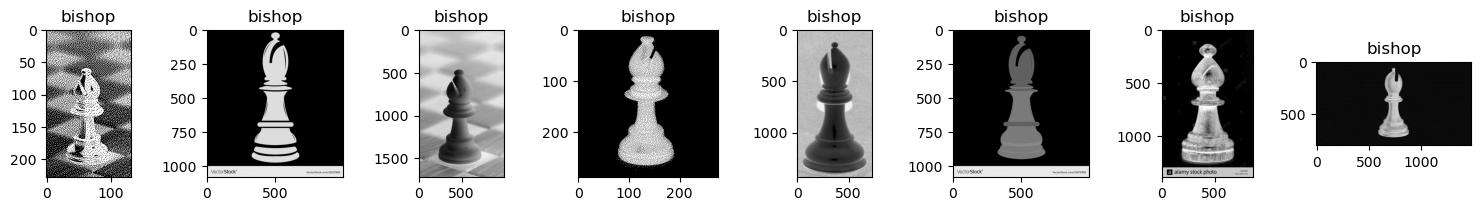

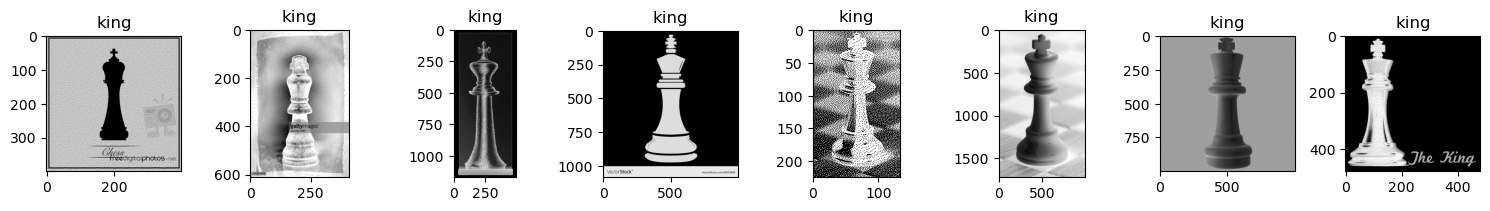

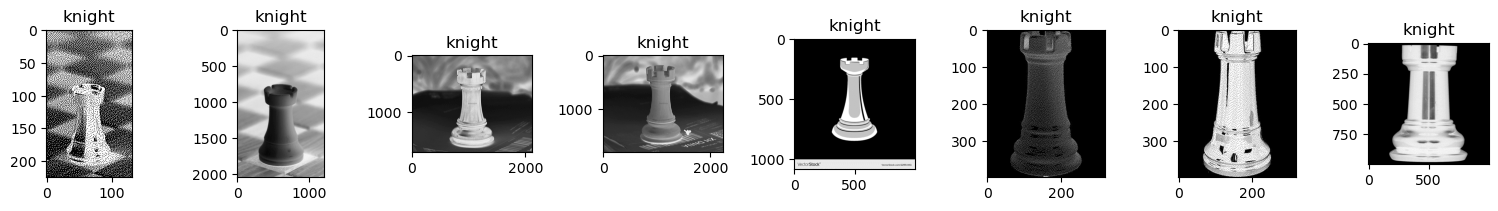

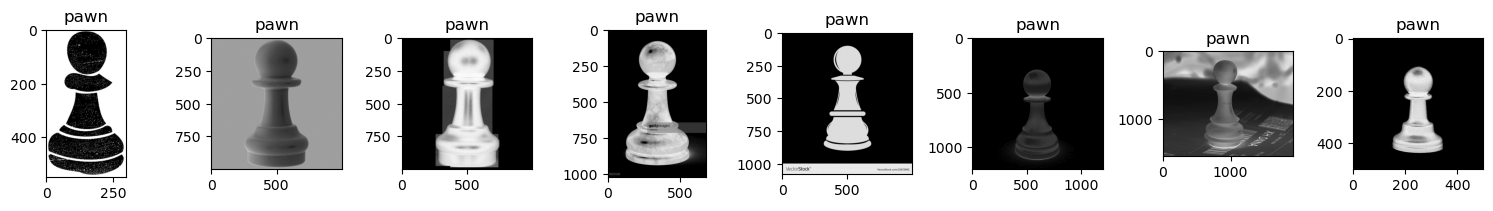

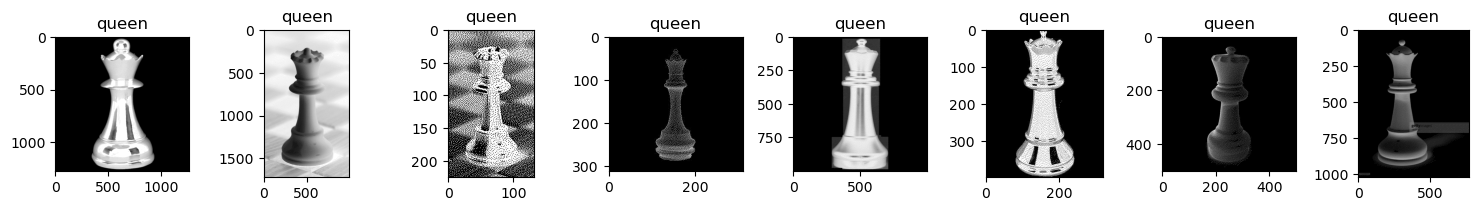

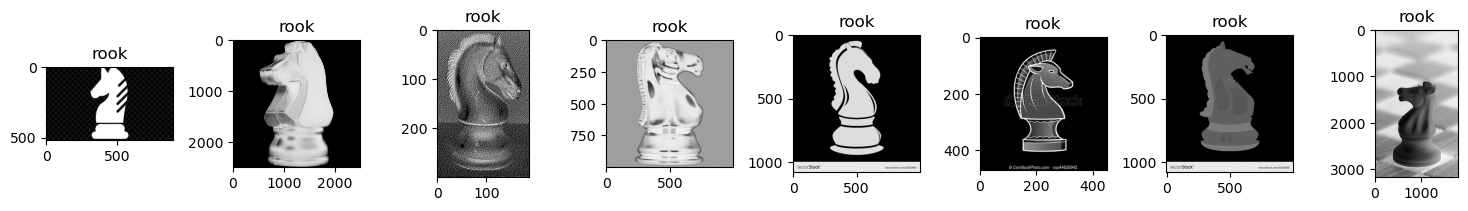

In [21]:
for path in dir_chess_paths_work:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8, 'binary')

In [22]:
def image_median_filtering(path_from, path_to, window_size=3):

    i=1
    files = os.listdir(path_from)
    for file in files: 
        try:
            file_dir = os.path.join(path_from, file)
            file_dir_save = os.path.join(path_to, file)
            img = Image.open(file_dir)
            img = img.filter(ImageFilter.MedianFilter(window_size))
            img.save(file_dir_save) 
            i=i+1
        except:
            continue

In [23]:
image_median_filtering(bishop_path_work, bishop_path_work)

In [24]:
image_median_filtering(king_path_work, king_path_work)

In [25]:

image_median_filtering(rook_path_work, rook_path_work)

In [26]:
image_median_filtering(pawn_path_work, pawn_path_work)

In [27]:

image_median_filtering(queen_path_work, queen_path_work)

In [28]:
image_median_filtering(knight_path_work, knight_path_work)

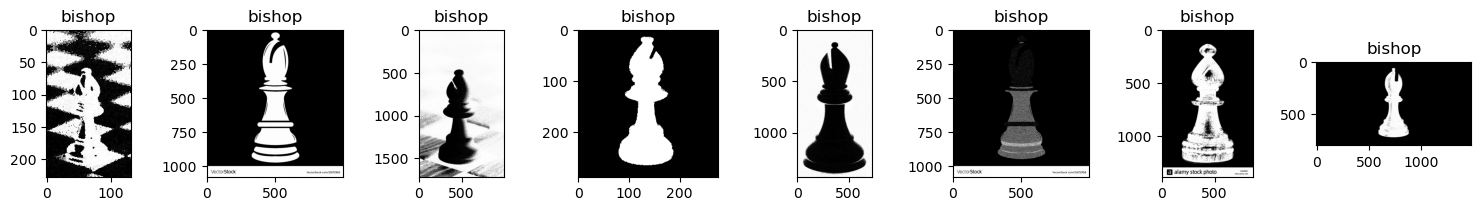

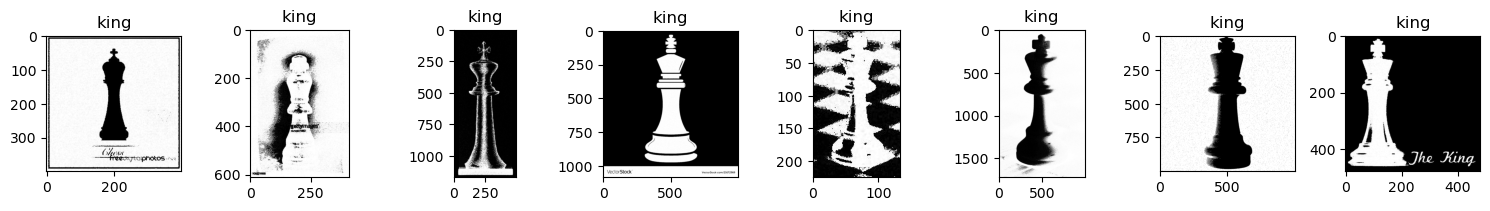

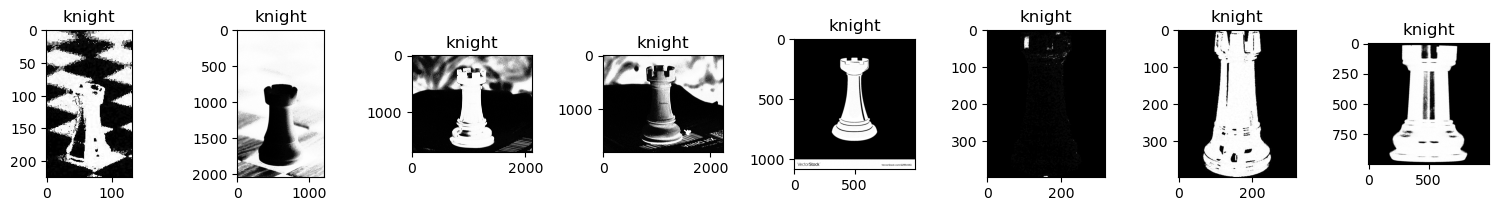

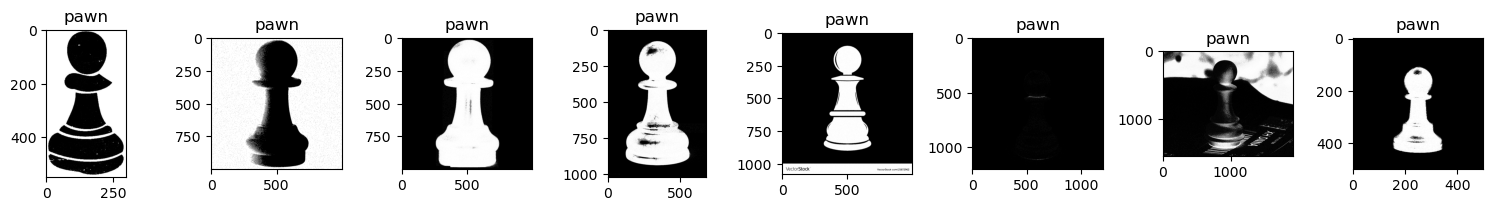

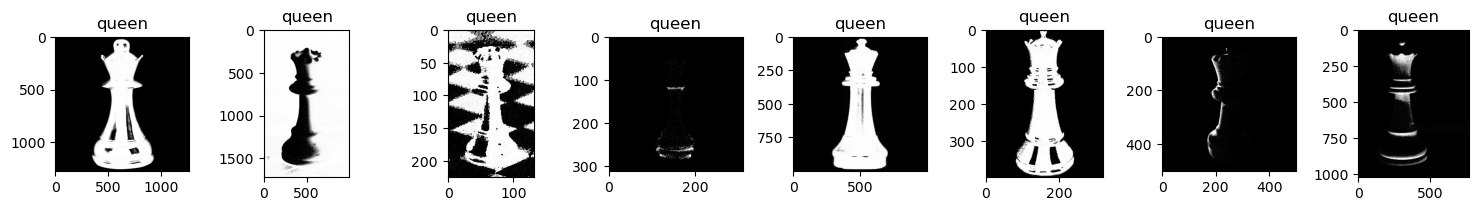

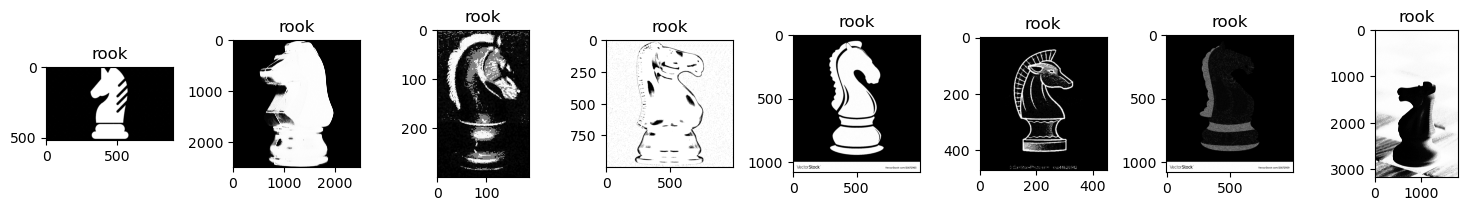

In [29]:
for path in dir_chess_paths_work:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8, 'binary')

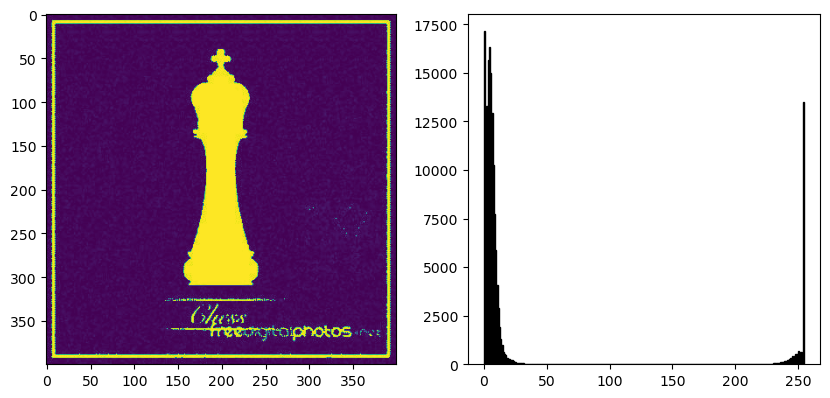

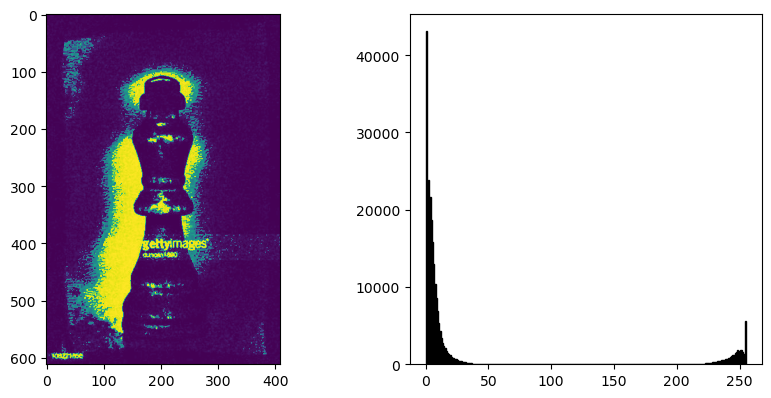

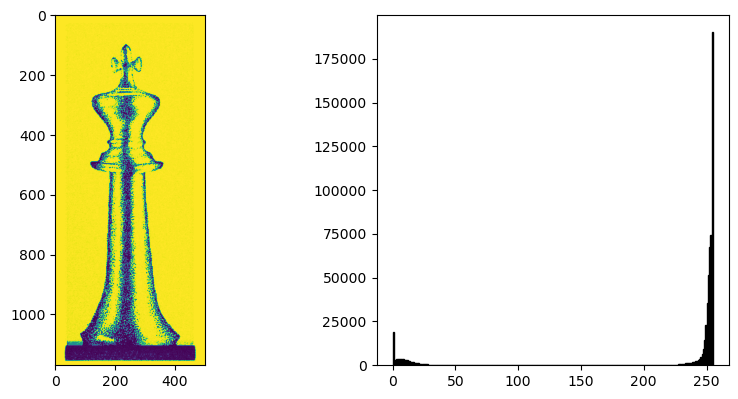

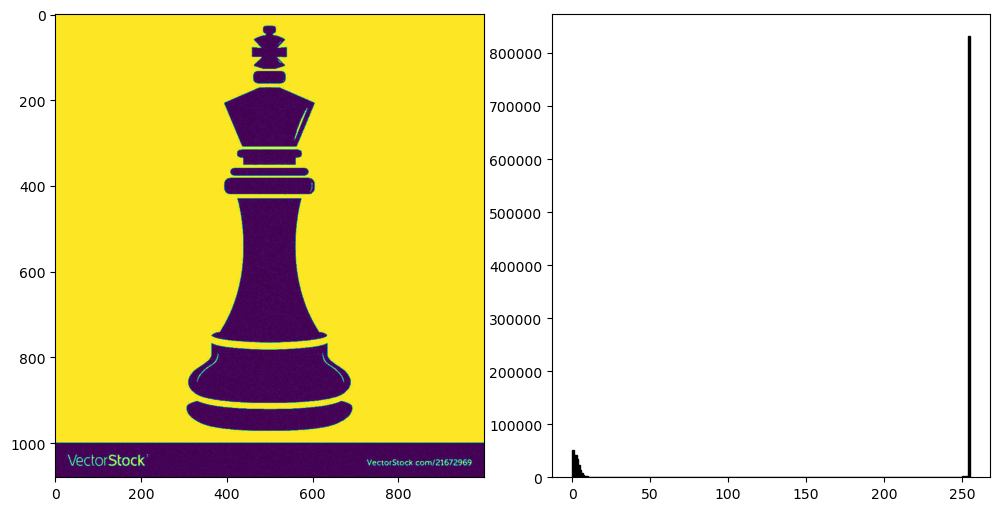

In [30]:
plot_img_hist(dir_chess_paths_work[1], 4)

In [31]:
img_size_h = 300
img_size_w = 300

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.3,
                                    rotation_range=90,
                                    width_shift_range=0.6,
                                    height_shift_range=0.6,
                                   shear_range=3, 
                                    zoom_range=50,
                                    horizontal_flip=True,
                                   vertical_flip=True)

In [33]:
input_shape = (img_size_h, img_size_w, 1)

In [34]:
batch_size=32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True, #we shuffle our images for better performance
    seed=42)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=7)

Found 389 images belonging to 6 classes.
Found 162 images belonging to 6 classes.


In [61]:
feature_layers = [
    Conv2D(32, (5,5), input_shape=input_shape, padding='same', activation='relu'),    
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (5,5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten()
]

In [62]:
classification_layers = [
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')    
]

In [63]:
model = Sequential(feature_layers + classification_layers)

In [64]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [65]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0005) 
callback = [learning_rate_reduction]

In [66]:
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=callback
    )

C:\Users\Kasun\AppData\Local\Temp\ipykernel_16636\2007630460.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
13/13 [==============================] - 19s 1s/step - loss: 5.0146 - accuracy: 0.2057 - val_loss: 1.7894 - val_accuracy: 0.1852 - lr: 0.0010
Epoch 2/15
13/13 [==============================] - 18s 1s/step - loss: 1.7906 - accuracy: 0.1645 - val_loss: 1.7907 - val_accuracy: 0.1790 - lr: 0.0010
Epoch 3/15
13/13 [==============================] - ETA: 0s - loss: 1.7898 - accuracy: 0.1774
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
13/13 [==============================] - 17s 1s/step - loss: 1.7898 - accuracy: 0.1774 - val_loss: 1.7885 - val_accuracy: 0.1790 - lr: 0.0010
Epoch 4/15
13/13 [==============================] - 17s 1s/step - loss: 1.7866 - accuracy: 0.1645 - val_loss: 1.7924 - val_accuracy: 0.1667 - lr: 5.0000e-04
Epoch 5/15
13/13 [==============================] - 17s 1s/step - loss: 1.8209 - accuracy: 0.1877 - val_loss: 1.7882 - val_accuracy: 0.1605 - lr: 5.0000e-04
Epoch 6/15
13/13 [==============================] - 17s 1s/step - lo

In [67]:
for l in feature_layers:
    l.trainable = False

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 300, 300, 32)      832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 146, 146, 32)      25632     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 73, 73, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 170528)           

In [69]:
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=callback
    )

C:\Users\Kasun\AppData\Local\Temp\ipykernel_16636\2007630460.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
13/13 [==============================] - 17s 1s/step - loss: 1.7823 - accuracy: 0.1954 - val_loss: 1.7919 - val_accuracy: 0.2037 - lr: 5.0000e-04
Epoch 2/15
13/13 [==============================] - 17s 1s/step - loss: 1.7817 - accuracy: 0.2159 - val_loss: 1.7840 - val_accuracy: 0.1667 - lr: 5.0000e-04
Epoch 3/15
13/13 [==============================] - 18s 1s/step - loss: 1.7821 - accuracy: 0.2082 - val_loss: 1.7809 - val_accuracy: 0.2037 - lr: 5.0000e-04
Epoch 4/15
13/13 [==============================] - 18s 1s/step - loss: 1.7796 - accuracy: 0.1825 - val_loss: 1.7875 - val_accuracy: 0.1914 - lr: 5.0000e-04
Epoch 5/15
13/13 [==============================] - 18s 1s/step - loss: 1.7841 - accuracy: 0.1799 - val_loss: 1.7902 - val_accuracy: 0.1852 - lr: 5.0000e-04
Epoch 6/15
13/13 [==============================] - 18s 1s/step - loss: 1.7831 - accuracy: 0.1877 - val_loss: 1.7859 - val_accuracy: 0.1667 - lr: 5.0000e-04
Epoch 7/15
13/13 [==============================] - 18s 1s

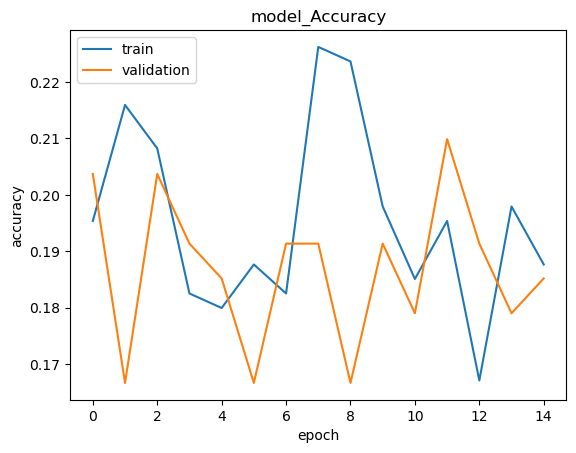

In [70]:
# plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')

1/1 [==============================] - 0s 90ms/step


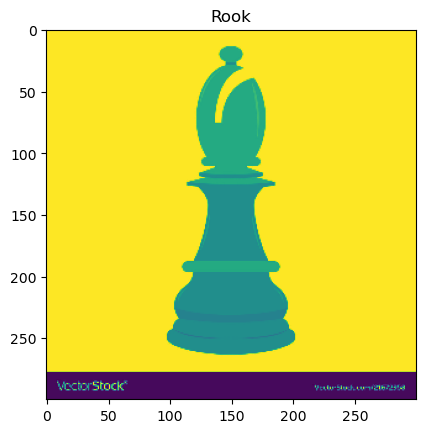

In [71]:
def prepare(file):
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size_w,img_size_h))
    plt.imshow(new_array)
    return new_array.reshape(-1, img_size_h, img_size_w, 1)
#image = testX[1]#your image path
image='./Data/input/Chessman-image-dataset/Chess/Bishop/00000006.jpg'
prediction = model.predict([prepare(image)])
#img_plot(image)
prediction = list(prediction[0])
#print(CATAGORIES[prediction.index(max(prediction))])
temp=CATAGORIES[prediction.index(max(prediction))]
plt.title(temp)
plt.show()